## **Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from scipy import stats

## **Load Dataset**

In [ ]:
# connect to google drive
from google.colab import drive
drive.mount ('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# load and strore dataset in a variable
data_dir = '/content/drive/MyDrive/200k_blitz_rapid_classical_bullet.csv'
df = pd.read_csv(data_dir)

<ipython-input-88-813770fd9888>:3: DtypeWarning: Columns (19,20,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,243,244,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_dir)


# **1. Sample**

In [ ]:
# sampling out 10% of the dataset
sampled_df = df.sample(frac = 0.1, random_state = 42)
sampled_df_2 = sampled_df.copy()

In [ ]:
# to drop the last 199 columns of Move_ply, Eval_ply and Time_ply
sampled_df.drop(columns=[f'Move_ply_{i}' for i in range(2, 201)], inplace=True)
sampled_df.drop(columns=[f'Eval_ply_{i}' for i in range(2, 201)], inplace=True)
sampled_df.drop(columns=[f'Clock_ply_{i}' for i in range(2, 201)], inplace=True)

In [ ]:
# to encode non-numeric data
# ec stands for encoded
le = LabelEncoder()
sampled_df['Black_ec'] = le.fit_transform(sampled_df['Black'])
sampled_df['Date_ec'] = le.fit_transform(sampled_df['Date'])
sampled_df['ECO_ec'] = le.fit_transform(sampled_df['ECO'])
sampled_df['Event_ec'] = le.fit_transform(sampled_df['Event'])
sampled_df['Opening_ec'] = le.fit_transform(sampled_df['Opening'])
sampled_df['Result_ec'] = le.fit_transform(sampled_df['Result'])
sampled_df['Site_ec'] = le.fit_transform(sampled_df['Site'])
sampled_df['Termination_ec'] = le.fit_transform(sampled_df['Termination'])
sampled_df['TimeControl_ec'] = le.fit_transform(sampled_df['TimeControl'])
sampled_df['UTCDate_ec'] = le.fit_transform(sampled_df['UTCDate'])
sampled_df['UTCTime_ec'] = le.fit_transform(sampled_df['UTCTime'])
sampled_df['White_ec'] = le.fit_transform(sampled_df['White'])
sampled_df['BlackTitle_ec'] = le.fit_transform(sampled_df['BlackTitle'])
sampled_df['WhiteTitle_ec'] = le.fit_transform(sampled_df['WhiteTitle'])
sampled_df['Category_ec'] = le.fit_transform(sampled_df['Category'])
sampled_df['Weekday_ec'] = le.fit_transform(sampled_df['Weekday'])
sampled_df['MovePly1_ec'] = le.fit_transform(sampled_df['Move_ply_1'])
sampled_df['EvalPly1_ec'] = le.fit_transform(sampled_df['Eval_ply_1'])
sampled_df['ClockPly1_ec'] = le.fit_transform(sampled_df['Clock_ply_1'])

In [ ]:
# to save the correlation matrix of the sampled dataset into a variable
correlation_matrix = sampled_df.corr()

<ipython-input-92-26e0a6dedc3f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = sampled_df.corr()


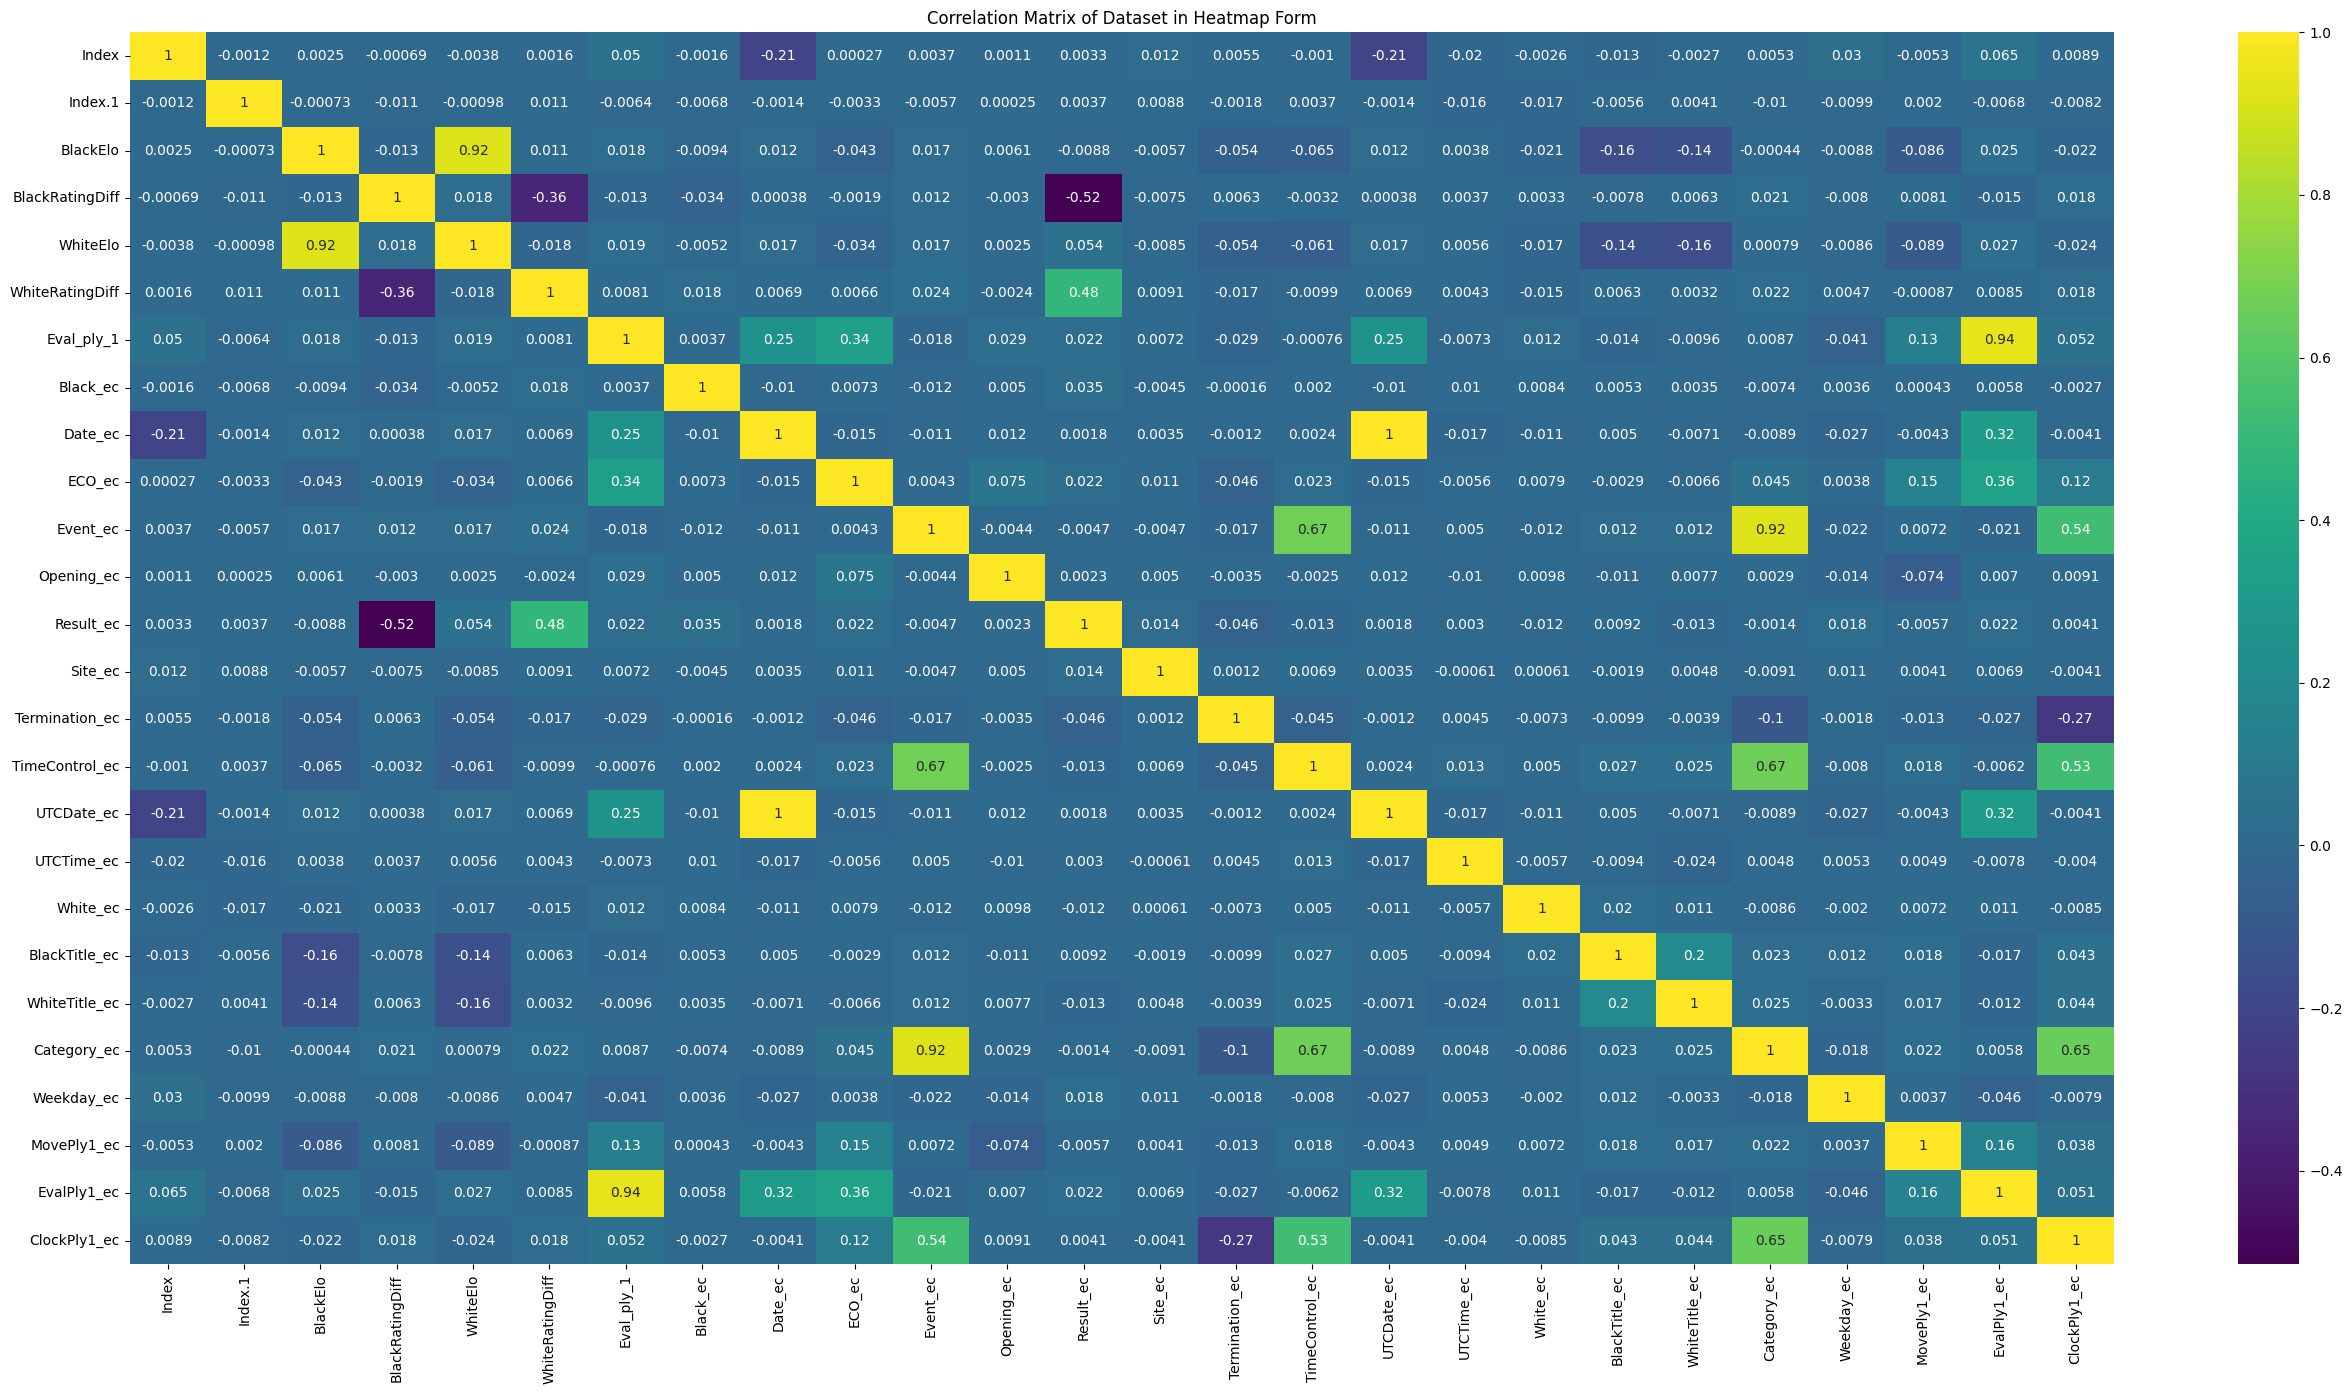

In [ ]:
# to view the correlation matrix in a heatmap form
plt.figure(figsize=(32,16))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title("Correlation Matrix of Dataset in Heatmap Form")
plt.show()

<ipython-input-94-5e26a37f55a6>:32: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


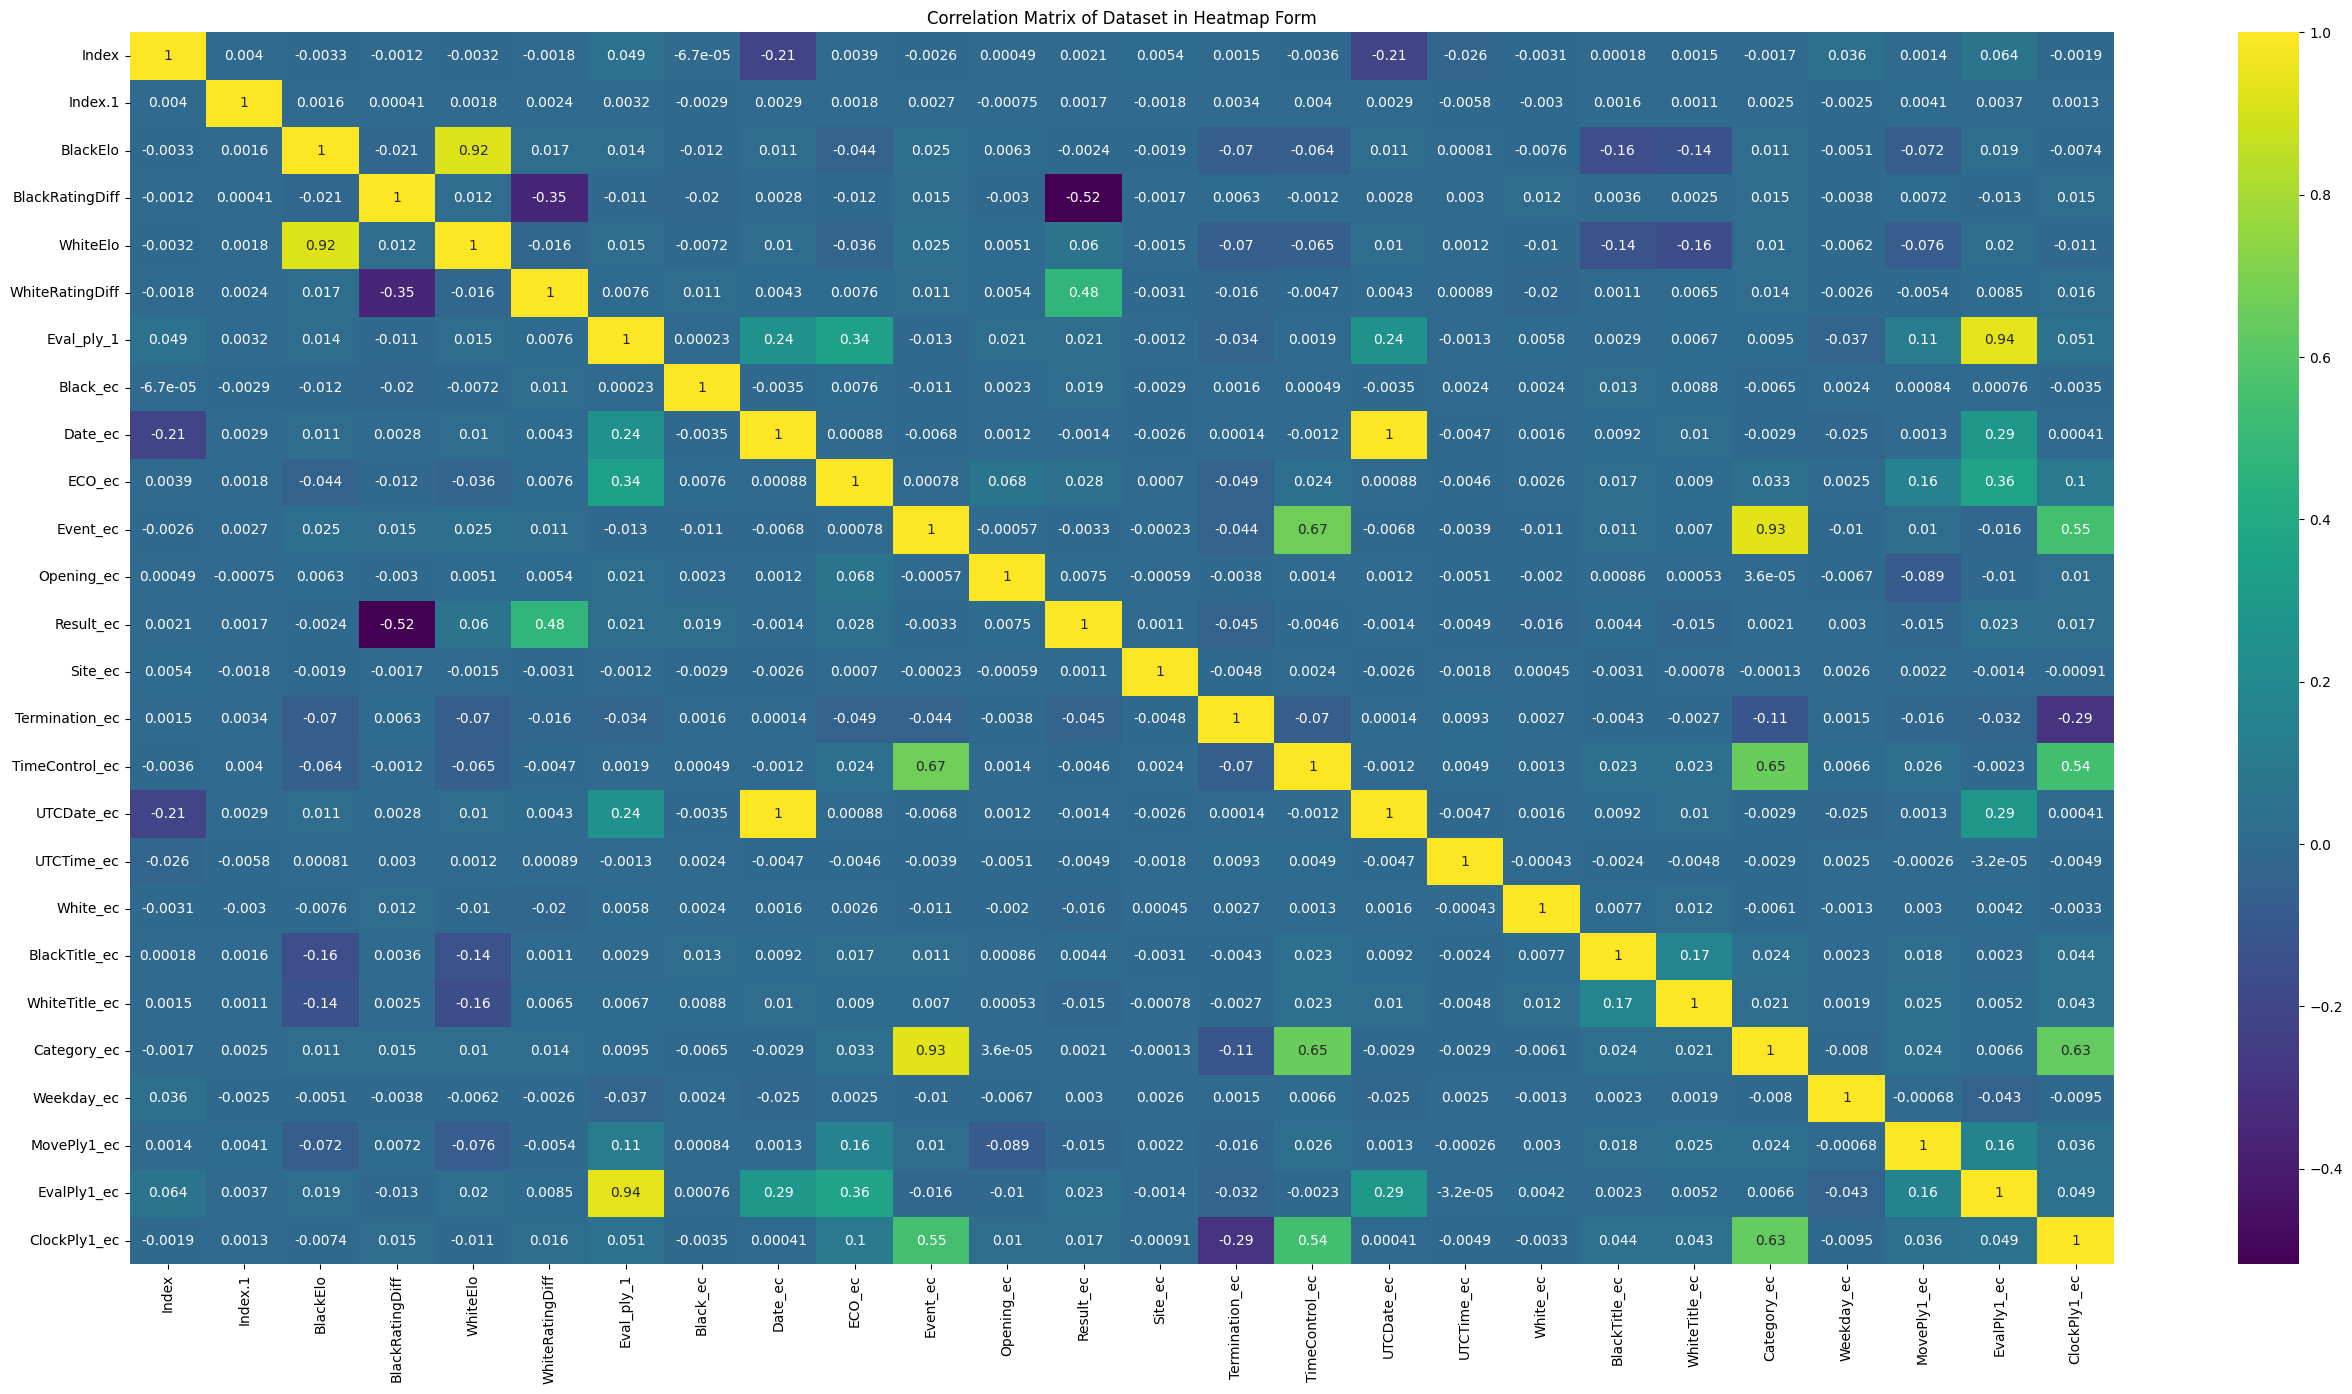

In [ ]:
# to check if the sampled dataset is sufficient for further analysis

# to drop the last 199 columns of Move_ply, Eval_ply and Time_ply of the original dataset
df.drop(columns=[f'Move_ply_{i}' for i in range(2, 201)], inplace=True)
df.drop(columns=[f'Eval_ply_{i}' for i in range(2, 201)], inplace=True)
df.drop(columns=[f'Clock_ply_{i}' for i in range(2, 201)], inplace=True)

# to encode non-numeric data
# ec stands for encoded
le = LabelEncoder()
df['Black_ec'] = le.fit_transform(df['Black'])
df['Date_ec'] = le.fit_transform(df['Date'])
df['ECO_ec'] = le.fit_transform(df['ECO'])
df['Event_ec'] = le.fit_transform(df['Event'])
df['Opening_ec'] = le.fit_transform(df['Opening'])
df['Result_ec'] = le.fit_transform(df['Result'])
df['Site_ec'] = le.fit_transform(df['Site'])
df['Termination_ec'] = le.fit_transform(df['Termination'])
df['TimeControl_ec'] = le.fit_transform(df['TimeControl'])
df['UTCDate_ec'] = le.fit_transform(df['UTCDate'])
df['UTCTime_ec'] = le.fit_transform(df['UTCTime'])
df['White_ec'] = le.fit_transform(df['White'])
df['BlackTitle_ec'] = le.fit_transform(df['BlackTitle'])
df['WhiteTitle_ec'] = le.fit_transform(df['WhiteTitle'])
df['Category_ec'] = le.fit_transform(df['Category'])
df['Weekday_ec'] = le.fit_transform(df['Weekday'])
df['MovePly1_ec'] = le.fit_transform(df['Move_ply_1'])
df['EvalPly1_ec'] = le.fit_transform(df['Eval_ply_1'])
df['ClockPly1_ec'] = le.fit_transform(df['Clock_ply_1'])

# to save the correlation matrix of the original dataset into a variable
correlation_matrix = df.corr()

# to view the correlation matrix of the original dataset in a heatmap form
plt.figure(figsize=(32,16))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title("Correlation Matrix of Dataset in Heatmap Form")
plt.show()

# **2. Explore**

In [ ]:
# to view the sampled dataset
sampled_df.head()

,Index,Index.1,Black,BlackElo,BlackRatingDiff,Date,ECO,Event,Opening,Result,Round,Site,Termination,TimeControl,UTCDate,UTCTime,White,WhiteElo,WhiteRatingDiff,BlackTitle,WhiteTitle,Move_ply_1,Eval_ply_1,Clock_ply_1,Category,Weekday,Black_ec,Date_ec,ECO_ec,Event_ec,Opening_ec,Result_ec,Site_ec,Termination_ec,TimeControl_ec,UTCDate_ec,UTCTime_ec,White_ec,BlackTitle_ec,WhiteTitle_ec,Category_ec,Weekday_ec,MovePly1_ec,EvalPly1_ec,ClockPly1_ec
119737,119737,9112,SamReiCooper,1785,-82.0,2019.05.11,C10,Rated Classical game,French Defense: Marshall Variation,1-0,-,https://lichess.org/QCliMLk7,Normal,900+15,2019.05.11,12:22:21,minalabh,1810,9.0,NaN,NaN,e4,0.24,0:15:00,Classical,Saturday,6950,11,164,895,378,1,8356,0,223,11,2284,14529,8,6,2,2,13,19,25
72272,72272,21606,FeddeXNL,1641,9.0,2019.05.05,B32,Rated Rapid tournament https://lichess.org/tou...,Sicilian Defense: Loewenthal Variation,0-1,-,https://lichess.org/Z2UOFbYw,Normal,600+0,2019.05.05,12:29:00,vahe1990,1602,-15.0,NaN,NaN,e4,0.12,0:10:00,Rapid,Sunday,2656,5,102,1039,1289,0,11273,0,180,5,2363,17802,8,6,3,3,13,14,20
158154,158154,5070,yks0312,1786,47.0,2019.05.17,B06,Rated Rapid game,Robatsch (Modern) Defense,0-1,-,https://lichess.org/gi6vZoqe,Normal,600+0,2019.05.17,12:45:44,fabramos,1598,-5.0,NaN,NaN,d4,0.25,0:10:00,Rapid,Friday,18389,17,77,905,1031,0,13769,0,180,17,2594,11515,8,6,3,0,11,20,20
65426,65426,7278,Batil,2416,-6.0,2019.05.31,B07,Rated Bullet game,Pirc Defense #2,1-0,-,https://lichess.org/qaXIzhqF,Normal,60+0,2019.05.31,14:41:44,NetCoder,2556,9.0,NaN,NaN,d4,0.25,0:01:00,Bullet,Friday,983,31,78,580,852,1,16899,0,171,31,4366,5670,8,6,1,0,11,20,7
30074,30074,23046,k1ll3u4,1646,-10.0,2019.05.27,C62,Rated Rapid game,Ruy Lopez: Steinitz Defense,1-0,-,https://lichess.org/E8Pvsp4E,Normal,600+0,2019.05.27,7:04:26,jon1004,1656,27.0,NaN,NaN,e4,0.24,0:10:00,Rapid,Monday,13203,27,215,905,1129,1,4500,0,180,27,15751,12984,8,6,3,1,13,19,20


In [ ]:
# dropping columns with non-numeric values
columns_to_drop = ['Black', 'Date', 'ECO', 'Event', 'Opening', 'Result', 'Site', 'Termination', 'TimeControl', 'UTCDate', 'UTCTime', 'White', 'BlackTitle', 'WhiteTitle', 'Category', 'Weekday', 'Move_ply_1', 'Eval_ply_1', 'Clock_ply_1']
sampled_df = sampled_df.drop(columns = columns_to_drop)

In [ ]:
# to view information regarding the sampled dataset
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 119737 to 51732
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index            20000 non-null  int64  
 1   Index.1          20000 non-null  int64  
 2   BlackElo         20000 non-null  int64  
 3   BlackRatingDiff  19935 non-null  float64
 4   Round            20000 non-null  object 
 5   WhiteElo         20000 non-null  int64  
 6   WhiteRatingDiff  19935 non-null  float64
 7   Black_ec         20000 non-null  int64  
 8   Date_ec          20000 non-null  int64  
 9   ECO_ec           20000 non-null  int64  
 10  Event_ec         20000 non-null  int64  
 11  Opening_ec       20000 non-null  int64  
 12  Result_ec        20000 non-null  int64  
 13  Site_ec          20000 non-null  int64  
 14  Termination_ec   20000 non-null  int64  
 15  TimeControl_ec   20000 non-null  int64  
 16  UTCDate_ec       20000 non-null  int64  
 17  UTCTime

In [ ]:
# to get the sum of null values in each column
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
sampled_df.isnull().sum()

Index               0
Index.1             0
BlackElo            0
BlackRatingDiff    65
Round               0
WhiteElo            0
WhiteRatingDiff    65
Black_ec            0
Date_ec             0
ECO_ec              0
Event_ec            0
Opening_ec          0
Result_ec           0
Site_ec             0
Termination_ec      0
TimeControl_ec      0
UTCDate_ec          0
UTCTime_ec          0
White_ec            0
BlackTitle_ec       0
WhiteTitle_ec       0
Category_ec         0
Weekday_ec          0
MovePly1_ec         0
EvalPly1_ec         0
ClockPly1_ec        0
dtype: int64

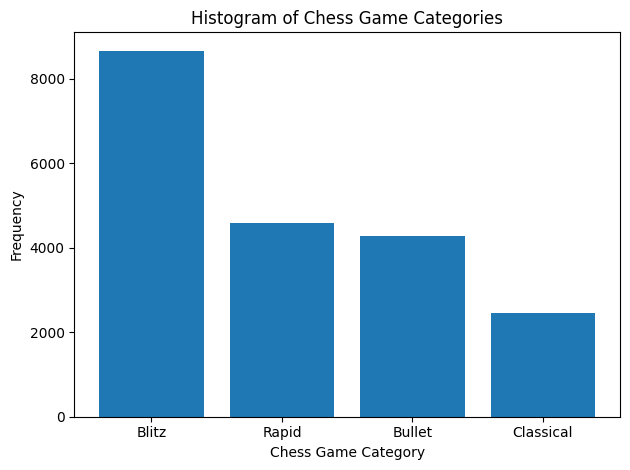

In [ ]:
# to view distribution of game categories
category_counts = sampled_df_2['Category'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.xlabel("Chess Game Category")
plt.ylabel("Frequency")
plt.title("Histogram of Chess Game Categories")
plt.tight_layout()
plt.show()

In [ ]:
# dropping unnecessary columns
columns_to_drop = ['Index', 'Index.1', 'Event_ec', 'UTCDate_ec', 'UTCTime_ec', 'Round', 'Site_ec', 'Black_ec', 'White_ec', 'Weekday_ec']
sampled_df = sampled_df.drop(columns = columns_to_drop)

In [ ]:
# dropping columns that are not highly correlated with category_ec
columns_to_drop = ['BlackElo','BlackRatingDiff', 'WhiteElo', 'WhiteRatingDiff', 'Date_ec', 'ECO_ec', 'Opening_ec', 'Result_ec', 'BlackTitle_ec', 'WhiteTitle_ec', 'EvalPly1_ec', 'MovePly1_ec']
final_df = sampled_df.drop(columns = columns_to_drop)

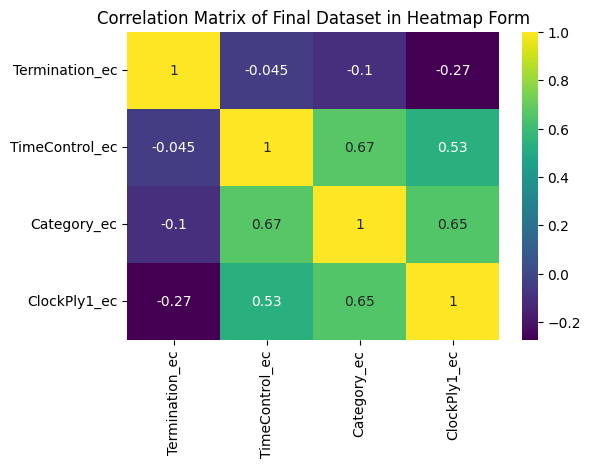

In [ ]:
# to save the correlation matrix of final dataset into a variable
correlation_matrix = final_df.corr()

# to view the correlation matrix of final dataset in a heatmap form
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title("Correlation Matrix of Final Dataset in Heatmap Form")
plt.show()

In [ ]:
# to view the final dataset
final_dataset = sampled_df_2[['Termination', 'TimeControl', 'Clock_ply_1', 'Category']]
final_dataset.head(5)

,Termination,TimeControl,Clock_ply_1,Category
119737,Normal,900+15,0:15:00,Classical
72272,Normal,600+0,0:10:00,Rapid
158154,Normal,600+0,0:10:00,Rapid
65426,Normal,60+0,0:01:00,Bullet
30074,Normal,600+0,0:10:00,Rapid


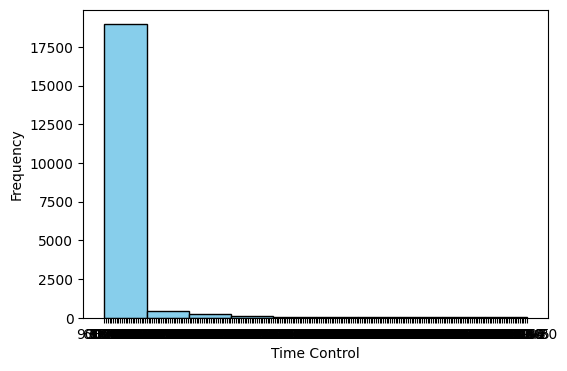

In [ ]:
# to view histogram of time control column
plt.figure(figsize=(6, 4))
plt.hist(sampled_df_2['TimeControl'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Time Control')
plt.ylabel('Frequency')
plt.show()

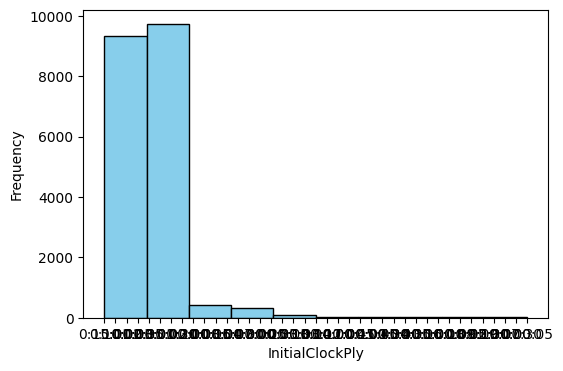

In [ ]:
# to view histogram of initial clock timing column
plt.figure(figsize=(6, 4))
plt.hist(sampled_df_2['Clock_ply_1'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('InitialClockPly')
plt.ylabel('Frequency')
plt.show()

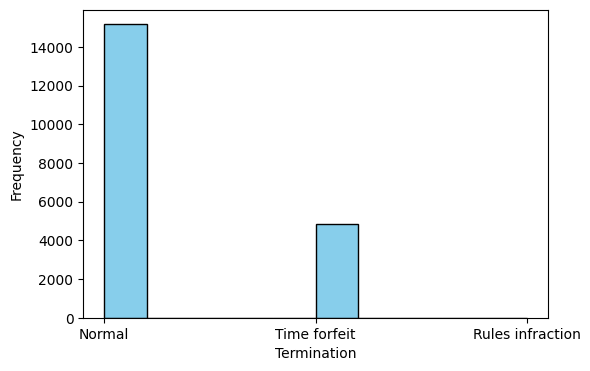

In [ ]:
# to view histogram of termination column
plt.figure(figsize=(6, 4))
plt.hist(sampled_df_2['Termination'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Termination')
plt.ylabel('Frequency')
plt.show()

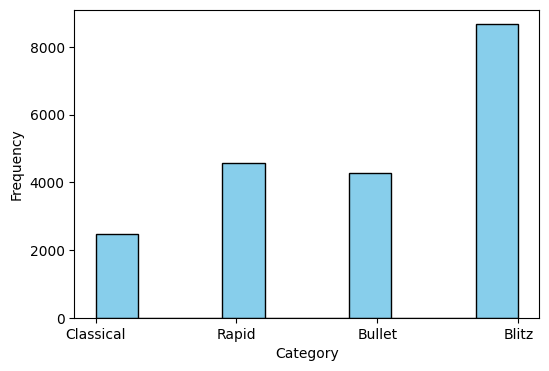

In [ ]:
# to view histogram of category column
plt.figure(figsize=(6, 4))
plt.hist(sampled_df_2['Category'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


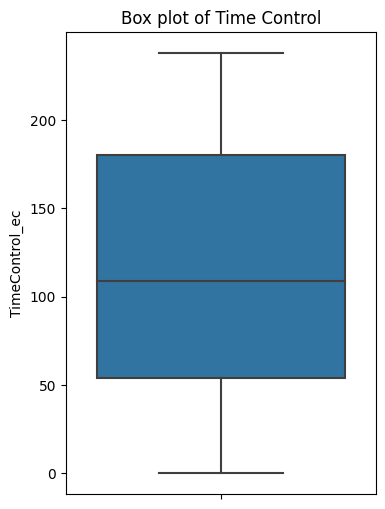

In [ ]:
# to view boxplot for time control column
plt.figure(figsize=(4, 6))
sns.boxplot(y=final_df['TimeControl_ec'], orient="h")
plt.title(f'Box plot of Time Control')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


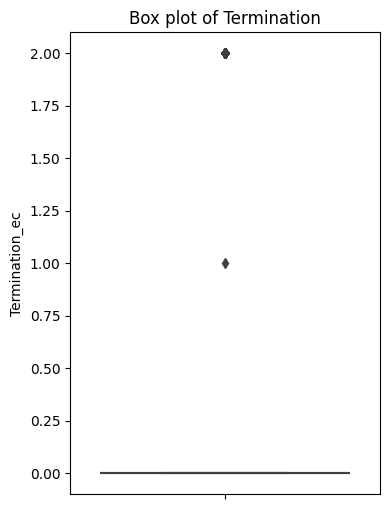

In [ ]:
# to view boxplot for termination column
plt.figure(figsize=(4, 6))
sns.boxplot(y=final_df['Termination_ec'], orient="h")
plt.title(f'Box plot of Termination')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


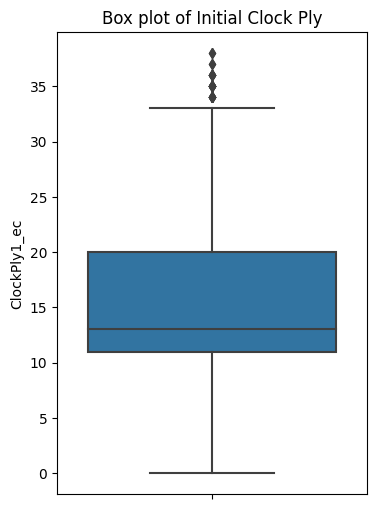

In [ ]:
# to view boxplot for initial clock timing column
plt.figure(figsize=(4, 6))
sns.boxplot(y=final_df['ClockPly1_ec'], orient="h")
plt.title(f'Box plot of Initial Clock Ply')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


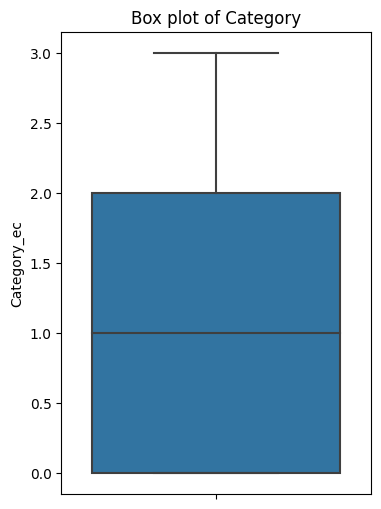

In [ ]:
# to view boxplot for category column
plt.figure(figsize=(4, 6))
sns.boxplot(y=final_df['Category_ec'], orient="h")
plt.title(f'Box plot of Category')
plt.show()

# **3. Modify**

In [ ]:
# removing the '+' and the value after in Time Control
final_df['TimeControl'] = sampled_df_2['TimeControl'].str.split('+').str[0].astype(int)
final_df['TimeControl_ec'] = le.fit_transform(final_df['TimeControl'])
final_df = final_df.drop('TimeControl', axis = 1)

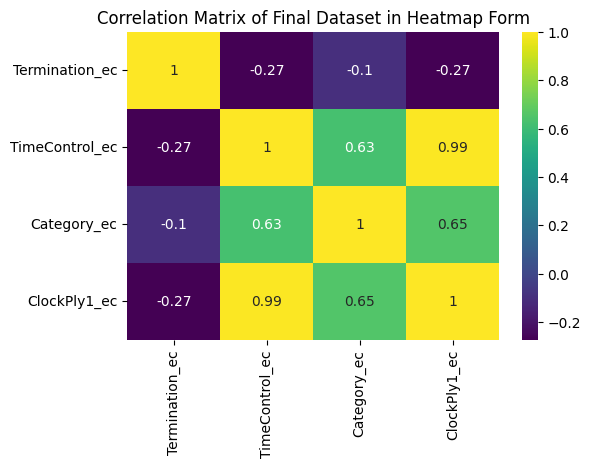

In [ ]:
# to view the correlation matrix of final dataset in a heatmap form to see if there is a significant differnce in correlation between category and time control
# to save the correlation matrix of final dataset into a variable
correlation_matrix = final_df.corr()

# to view the correlation matrix of final dataset in a heatmap form
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title("Correlation Matrix of Final Dataset in Heatmap Form")
plt.show()

In [ ]:
# removing outliers from initial clock timing column
q1 = final_df['ClockPly1_ec'].quantile(0.25)
q3 = final_df['ClockPly1_ec'].quantile(0.75)
iqr = q3 - q1
k = 1.5
lower_bound = q1 - k * iqr
upper_bound = q3 + k * iqr
outliers = (final_df['ClockPly1_ec'] < lower_bound) | (final_df['ClockPly1_ec'] > upper_bound)
final_df = final_df[~outliers]

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


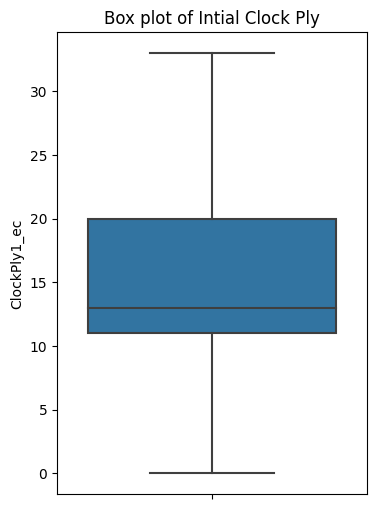

In [ ]:
# to view boxplot for initial clock timing column after removing the outliers
plt.figure(figsize=(4, 6))
sns.boxplot(y=final_df['ClockPly1_ec'], orient="h")
plt.title(f'Box plot of Intial Clock Ply')
plt.show()

In [ ]:
# to normalize the three input features
scaler = MinMaxScaler()
ClockPly1_normalized = scaler.fit_transform(final_df[['ClockPly1_ec']])
TimeControl_normalized = scaler.fit_transform(final_df[['TimeControl_ec']])
Termination_normalized = scaler.fit_transform(final_df[['Termination_ec']])

final_df['ClockPly1_normalized'] = ClockPly1_normalized
final_df['TimeControl_normalized'] = TimeControl_normalized
final_df['Termination_normalized'] = Termination_normalized

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


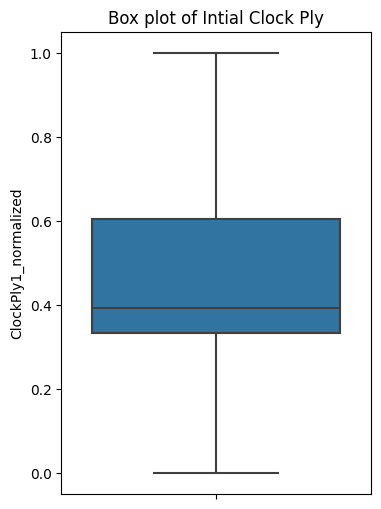

In [ ]:
# to view boxplot for initial clock timing column after normalizing
plt.figure(figsize=(4, 6))
sns.boxplot(y=final_df['ClockPly1_normalized'], orient="h")
plt.title(f'Box plot of Intial Clock Ply')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


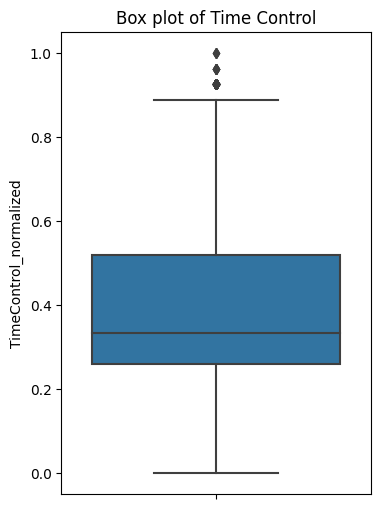

In [ ]:
# to view boxplot for time control column after normalizing
plt.figure(figsize=(4, 6))
sns.boxplot(y=final_df['TimeControl_normalized'], orient="h")
plt.title(f'Box plot of Time Control')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


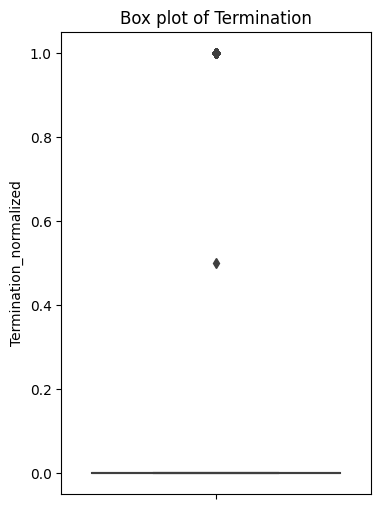

In [ ]:
# to view boxplot for termination column after normalizing
plt.figure(figsize=(4, 6))
sns.boxplot(y=final_df['Termination_normalized'], orient="h")
plt.title(f'Box plot of Termination')
plt.show()

In [ ]:
# removing outliers from time control column after normalizing
q1 = final_df['TimeControl_normalized'].quantile(0.25)
q3 = final_df['TimeControl_normalized'].quantile(0.75)
iqr = q3 - q1
k = 1.5
lower_bound = q1 - k * iqr
upper_bound = q3 + k * iqr
outliers = (final_df['TimeControl_normalized'] < lower_bound) | (final_df['TimeControl_normalized'] > upper_bound)
final_df = final_df[~outliers]

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


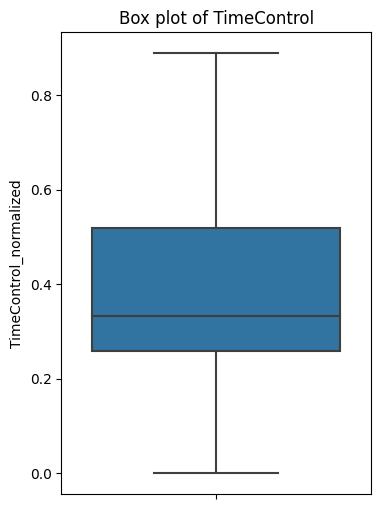

In [ ]:
# to view boxplot for time control column after normalizing and removing outliers
plt.figure(figsize=(4, 6))
sns.boxplot(y=final_df['TimeControl_normalized'], orient="h")
plt.title(f'Box plot of TimeControl')
plt.show()

In [ ]:
# to remove the columns that are no longer needed
columns_to_drop = ['Termination_ec','TimeControl_ec', 'ClockPly1_ec']
final_df = final_df.drop(columns = columns_to_drop)
final_df.head()

,Category_ec,ClockPly1_normalized,TimeControl_normalized,Termination_normalized
119737,2,0.757576,0.703704,0.0
72272,3,0.606061,0.518519,0.0
158154,3,0.606061,0.518519,0.0
65426,1,0.212121,0.148148,0.0
30074,3,0.606061,0.518519,0.0


In [ ]:
unique = final_df['Termination_normalized'].unique()
unique

array([0. , 1. , 0.5])

# **4. Model**

In [ ]:
# creating a train-test split for modelling
train = final_df[["ClockPly1_normalized", "TimeControl_normalized", "Termination_normalized"]]
target = final_df[["Category_ec"]]
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.3, stratify = target, random_state = 42)

In [ ]:
# create a decision tree classifier to build model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 96.83%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2600
           1       0.99      1.00      0.99      1286
           2       0.88      1.00      0.94       699
           3       0.98      0.89      0.93      1375

    accuracy                           0.97      5960
   macro avg       0.96      0.97      0.96      5960
weighted avg       0.97      0.97      0.97      5960



# **5. Asses**

In [ ]:
le = LabelEncoder()
scaler = MinMaxScaler()

# Gather user input for the features
user_input = {}
user_input['Termination'] = (input("Enter the Termination Type: "))
user_input['TimeControl'] = (input("Enter the Time Control setting: " ))
user_input['InitialClockPly'] = (input("Enter the Initial Time Setting (in seconds): "))

# Prepare user input data
user_input_df = pd.DataFrame([user_input])

# Ensure the input features are in the same order as the trained model expects
user_input_df = user_input_df[['Termination', 'TimeControl', 'InitialClockPly']]

# Encode the features using the same encoder used for training
user_input_encoded = le.fit_transform(user_input_df)

# Normalize the features using the same scaler used for training
user_input_normalized = scaler.fit_transform(user_input_encoded)

# Use the trained model to make predictions based on user input
prediction_encoded = tree.predict(user_input_df)

# Decode the prediction back to original label
prediction = le['Result'].inverse_transform(prediction_encoded)[0]

print(prediction)